In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math

dataDir = "c:/Users/llave/Documents/CMS/data/electron_selection_compressedV2/"

In [7]:
ids = []
for file in os.listdir(dataDir):
    if("bkg_0p25"in file and ".npz" in file):
        
        # load images from file
        temp = np.load(dataDir+file)
        if(len(temp['infos'])>0): infos = temp['infos']
        
        for info in infos:
            ids.append(info[2])

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


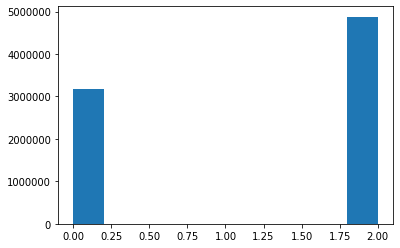

In [10]:
%matplotlib inline
plt.hist(ids)
print(ids[:10])